In [29]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np

In [30]:
cell_size = (1,1,0)

boundary_layer = [
    mp.PML(0.3, mp.X),
    mp.PML(0.3, mp.Y)
                  ]

In [31]:
# lambda_min = 0.4
# lambda_max = 0.7
# fmin = 1 / lambda_min
# fmax = 1 / lambda_max
fcen = 0.55
df =  0.3
resolution = 100
nfreq = 100

In [32]:
source_center = mp.Vector3(0,0,0)
sources = [mp.Source(
    src=mp.GaussianSource(frequency=fcen, fwidth=df),
    component=mp.Ey,
    center=source_center
)]

In [33]:
sim = mp.Simulation(
    cell_size=cell_size,
    default_material=mp.Medium(index=1),
    boundary_layers=boundary_layer,
    sources=sources,
    resolution=resolution
)

In [34]:
offset = 0.01
flux_size = 0.02

box_power = sim.add_flux(
    fcen, df, nfreq,
    mp.FluxRegion(center=source_center - mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size),
                  # direction=mp.Y, 
                  weight=-1),
    mp.FluxRegion(center=source_center + mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size),
                  # direction=mp.Y
                ),
    mp.FluxRegion(center=source_center - mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0),
                  # direction=mp.Y, 
                  weight=-1),
    mp.FluxRegion(center=source_center + mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0),
                  # direction=mp.Y
                  )
)

<Axes: xlabel='X', ylabel='Y'>

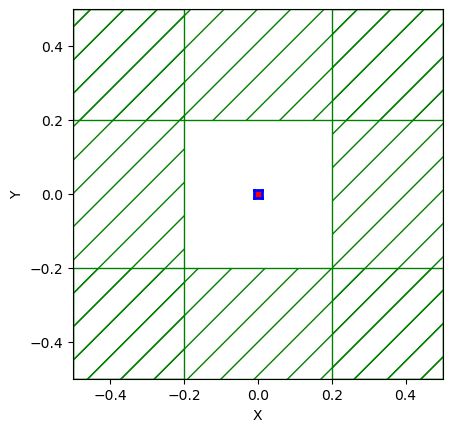

In [35]:
sim.plot2D()

-----------
Initializing structure...
time for choose_chunkdivision = 8.10623e-05 s
Working in 2D dimensions.
Computational cell is 1 x 1 x 0 with resolution 100
time for set_epsilon = 0.00537395 s
-----------


run 0 finished at t = 50.0 (10000 timesteps)
λ (μm)		net dipole power (W)
2.5000		3.144956e-05
2.4812		4.320062e-05
2.4627		5.817988e-05
2.4444		7.818013e-05
2.4265		1.061121e-04
2.4088		1.462586e-04
2.3913		2.045527e-04
2.3741		2.889892e-04
2.3571		4.103015e-04
2.3404		5.829977e-04
2.3239		8.267388e-04
2.3077		1.167904e-03
2.2917		1.641081e-03
2.2759		2.290205e-03
2.2603		3.169246e-03
2.2449		4.342563e-03
2.2297		5.885383e-03
2.2148		7.884960e-03
2.2000		1.044290e-02
2.1854		1.367868e-02
2.1711		1.773396e-02
2.1569		2.277635e-02
2.1429		2.900171e-02
2.1290		3.663365e-02
2.1154		4.592004e-02
2.1019		5.712705e-02
2.0886		7.053204e-02
2.0755		8.641621e-02
2.0625		1.050579e-01
2.0497		1.267253e-01
2.0370		1.516676e-01
2.0245		1.801015e-01
2.0122		2.121932e-01
2.0000		2.480347e-01
1.9880		2.876196e-01
1.9760		3.308215e-01
1.9643		3.773795e-01
1.9527		4.268956e-01
1.9412		4.788424e-01
1.9298		5.325785e-01
1.9186		5.873679e-01
1.9075		6.423970e-01
1.8966		6.967895e-01
1.8857		7.496177e-01
1.

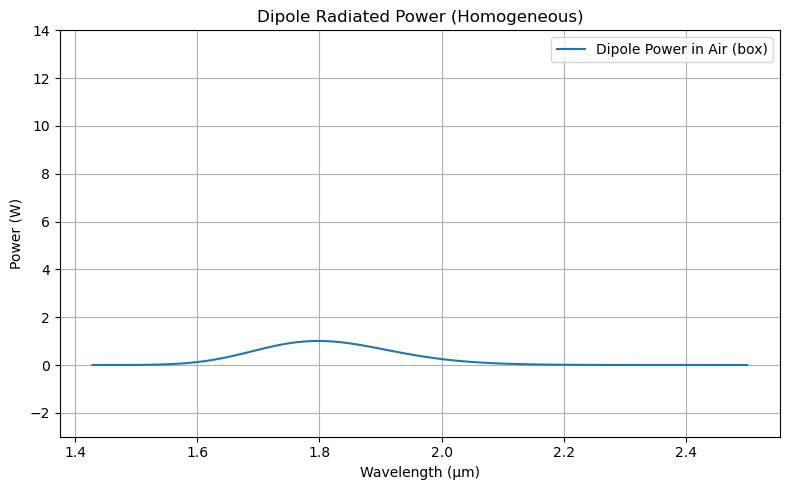

In [ ]:
# === 시뮬레이션 실행 ===
sim.run(until=50)
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(), 1e-8))

# === 측정된 flux 데이터 얻기 ===
flux_freqs = mp.get_flux_freqs(box_power)   # 측정된 주파수 배열 (1/μm)
net_power = mp.get_fluxes(box_power)        # 측정된 각 주파수의 dipole 방사 power (W)

# === 파장으로 변환 (μm)
wavelengths = 1 / np.array(flux_freqs)

# === 결과 출력 예시
print("λ (μm)\t\tnet dipole power (W)")
for i in range(nfreq):
    print(f"{wavelengths[i]:.4f}\t\t{net_power[i]:.6e}")

# === 시각화 (옵션)
plt.figure(figsize=(8,5))
plt.plot(wavelengths, net_power, label="Dipole Power in Air (box)")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Power (W)")
plt.title("Dipole Radiated Power (Homogeneous)")
plt.ylim([-3, 14])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
